# Projet 6 : Classifiez automatiquement des biens de consommation

Vous êtes Data Scientist au sein de l’entreprise "Place de marché”, qui souhaite lancer une marketplace e-commerce.

logo entreprise place de marché
Sur la place de marché, des vendeurs proposent des articles à des acheteurs en postant une photo et une description.

Pour l'instant, l'attribution de la catégorie d'un article est effectuée manuellement par les vendeurs, et est donc peu fiable. De plus, le volume des articles est pour l’instant très petit.

Pour rendre l’expérience utilisateur des vendeurs (faciliter la mise en ligne de nouveaux articles) et des acheteurs (faciliter la recherche de produits) la plus fluide possible, et dans l'optique d'un passage à l'échelle, il devient nécessaire d'automatiser cette tâche.

Linda, Lead Data Scientist, vous demande donc d'étudier la faisabilité d'un moteur de classification des articles en différentes catégories, avec un niveau de précision suffisant.

Voici le mail qu’elle vous a envoyé.

 

Bonjour, 

Merci pour ton aide sur ce projet !

Ta mission est de réaliser, dans une première itération, une étude de faisabilité d'un moteur de classification d'articles, basé sur une image et une description, pour l'automatisation de l'attribution de la catégorie de l'article.

Tu dois analyser les descriptions textuelles et les images des produits, au travers des étapes suivantes : 

Un prétraitement des données texte ou image suivant le cas ;
Une extraction de features ;
Une réduction en 2 dimensions, afin de projeter les produits sur un graphique 2D, sous la forme de points dont la couleur correspondra à la catégorie réelle ;
Analyse du graphique afin d’en déduire ou pas, à l’aide des descriptions ou des images, la faisabilité de regrouper automatiquement des produits de même catégorie ;
Réalisation d’une mesure pour confirmer ton analyse visuelle, en calculant la similarité entre les catégories réelles et les catégories issues d’une segmentation en clusters.
Pourrais-tu nous démontrer, par cette approche, la faisabilité de regrouper automatiquement des produits de même catégorie ?

Voici les contraintes : 

Afin d’extraire les features texte, il sera nécessaire de mettre en œuvre : 
deux approches de type “bag-of-words”, comptage simple de mots et Tf-idf ;
une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText) ;
une approche de type word/sentence embedding avec BERT ;
une approche de type word/sentence embedding avec USE (Universal Sentence Encoder). 
En pièce jointe, tu trouveras un exemple de mise en œuvre de ces approches d’extraction de features texte sur un autre dataset. Je t’invite à l’utiliser comme point de départ, cela va te faire gagner beaucoup de temps !

Afin d’extraire les features image, il sera nécessaire de mettre en œuvre :
un algorithme de type SIFT / ORB / SURF ;
un algorithme de type CNN Transfer Learning.
Concernant l’approche de type SIFT, je t’invite à regarder le webinaire que nous avons réalisé, disponible dans les ressources.

En pièces jointes, tu trouveras un exemple de mise en œuvre de l’approche de type CNN Transfer Learning d’extraction de features images sur un autre dataset. Je t’invite à l’utiliser comme point de départ, cela va te faire gagner beaucoup de temps !

Merci encore, 

Linda

PS : J’ai bien vérifié qu’il n’y avait aucune contrainte de propriété intellectuelle sur les données et les images.

Pièces jointes : 

premier jeu de données d’articles avec le lien pour télécharger la photo et une description associée
un notebook d’exemple d’étude de faisabilité


Une semaine plus tard, vous partagez votre travail avec Linda, et elle vous répond avec enthousiasme avec une autre demande.

Bonjour,

Merci beaucoup pour ton travail !

Bravo d’avoir démontré la faisabilité de regrouper automatiquement des produits de même catégorie ! 

Maintenant, je te propose de passer à la deuxième itération. Pourrais-tu réaliser une classification supervisée à partir des images ? Je souhaiterais que tu mettes en place une data augmentation afin d’optimiser le modèle.

En pièce jointe, tu trouveras un exemple de mise en œuvre de classification supervisée sur un autre dataset. Je t’invite à l’utiliser comme point de départ, cela va te faire gagner beaucoup de temps !

Nous souhaitons élargir notre gamme de produits, en particulier dans l’épicerie fine. Pourrais-tu tester la collecte de produits à base de “champagne” via l’API disponible ici ? Je souhaiterais que tu puisses nous fournir une extraction des 10 premiers produits dans un fichier “.csv”, contenant pour chaque produit les données suivantes : foodId, label, category, foodContentsLabel, image.

Merci encore, 

Linda

Pièces jointes : 

un notebook d’exemple de classification supervisée d’images
Bon courage !

# Sommaire




## I. Importation

1.   Importation des bibliothèques
2.   Importation du fichier

## II. Exploration du fichier


1.   Analyse du fichier
2.   Analyse des données

## III. Traitement du fichier


1.   Comptage des mots et caractères
2.   Traitement description


## IV. Démarches de word/sentence embedding


1.   Approche Word2Vec (CountVectorizer et TF-IDF)
2.   Approche BERT
3.   Approche Use


## V. Traitement des images

1.   Import des données
2.   Approche SIFT et ORB
3.   Transfer Learning

### VI. Conclusion Etude de faisabilité




# 

# I. Importation

###  1. Importation des bibliothèques

In [1]:
# pip install transformers

In [2]:
# Bibliothèques standards
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import time

import warnings
warnings.filterwarnings('ignore')

# Bibliothèques NLP
import nltk
import string
import re
import nltk.corpus
from nltk.corpus import stopwords
from nltk.util import ngrams
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop=set(stopwords.words('english'))
from wordcloud import WordCloud
from collections import defaultdict
from collections import  Counter

# Traitement texte
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Analyse et modélisation texte
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix


from transformers import AutoTokenizer, TFAutoModel
tokenizer = AutoTokenizer.from_pretrained("t5-base")




# Image

import cv2

from matplotlib.image import imread
from os import listdir
from sklearn import cluster
from sklearn import preprocessing
from sklearn import manifold
from sklearn import metrics
from sklearn import decomposition
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow.keras
#from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gregm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gregm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gregm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.Importation du fichier

In [3]:
# Importation du fichier

data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

# 

# II. Exploration du fichier

### 1.   Analyse du fichier



In [4]:
data.head(10)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
5  893aa5ed55f7cff2eccea7758d7a86bd  2015-12-04 07:25:36 +0000   
6  f355cc1ccb08bd0d283ed979b7ee7515  2015-12-04 07:25:36 +0000   
7  dd0e3470a7e6ed76fd69c2da27721041  2015-12-04 07:25:36 +0000   
8  41384da51732c0b4df3de8f395714fbb  2015-12-04 07:25:36 +0000   
9  710ed5f2393a4b9e8823aa0029f71f93  2015-12-04 07:25:36 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   
5  http://www.flipkart.com/maserati-time-r8851116...   
6  http://www.flipkart.com/camerii-wm64-elegance-...   
7  http://www.flipkart.com/t-star-uft-tsw-005-bk-...   
8  http://www.flipkart.com/alfajr-wy16b-youth-dig...   
9  http://www.flipkart.com/tag-heuer-cau1116-ba08...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   
5  Maserati Time R8851116001 Analog Watch  - For ...   
6  Camerii WM64 Elegance Analog Watch  - For Men,...   
7  T STAR UFT-TSW-005-BK-BR Analog Watch  - For Boys   
8  Alfajr WY16B Youth Digital Watch  - For Men, Boys   
9  TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
5  ["Watches >> Wrist Watches >> Maserati Time Wr...  WATEAYAHJ8CUCAYM   
6  ["Watches >> Wrist Watches >> Camerii Wrist Wa...  WATE6Y6D2MZHWGBZ   
7  ["Watches >> Wrist Watches >> T STAR Wrist Wat...  WATECFFVGFZPAD3D   
8  ["Watches >> Wrist Watches >> Alfajr Wrist Wat...  WATECHFU4QGFQEJG   
9  ["Watches >> Wrist Watches >> TAG Heuer Wrist ...  WATEA6UGFGKZKDJC   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
5       24400.0           24400.0  893aa5ed55f7cff2eccea7758d7a86bd.jpg   
6        1099.0             449.0  f355cc1ccb08bd0d283ed979b7ee7515.jpg   
7         999.0             399.0  dd0e3470a7e6ed76fd69c2da27721041.jpg   
8        5495.0            4995.0  41384da51732c0b4df3de8f395714fbb.jpg   
9      107750.0          107750.0  710ed5f2393a4b9e8823aa0029f71f93.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    

In [5]:
print('Pour notre fichier:')
print('Nous avons {} lignes et {} colonnes dans notre jeu de données.'.format(data.shape[0],data.shape[1]))


Pour notre fichier:
Nous avons 1050 lignes et 15 colonnes dans notre jeu de données.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

<AxesSubplot:title={'center':'Analyse du type des colonnes'}, ylabel='None'>

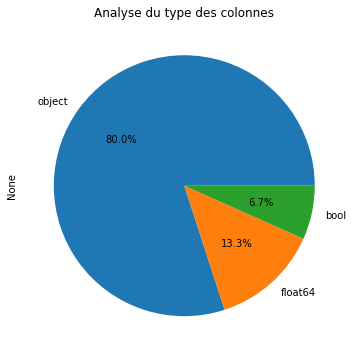

In [7]:
# Représentation de la nature des colonnes

# Définition titre graphique

title = {"family": "arial",
              "color":  "black",
              "weight": "bold",
              "size": 18}

plt.figure(figsize = (6,6))
data.dtypes.value_counts().plot(kind = 'pie',
                               autopct="%1.1f%%", title = "Analyse du type des colonnes")

<AxesSubplot:>

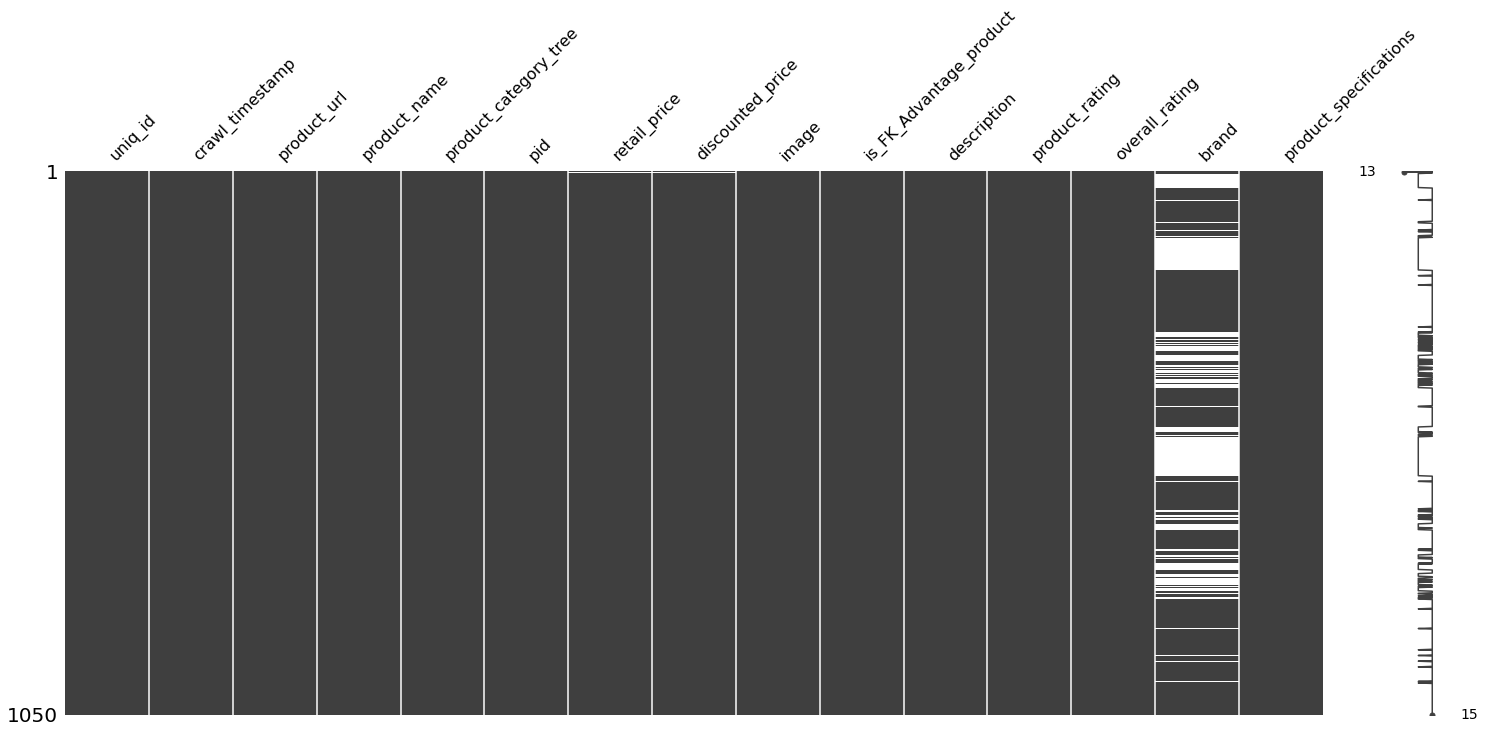

In [8]:
msno.matrix(data)

Lors de l'exploration de notre fichier, nous pouvons constater que ce dernier contient 15 colonnes et 1050 lignes.

Notre fichier contient des informations concernant les produits vendus (référence de l'article, une description, le prix, un lien vers l'image, ...). 

Notre fichier présente assez peu de valeurs manquantes. En effet, seul les colonnes brand et product_specifications présentent des valeurs absentes.

A présent, nous allons commencer à analyser les différentes colonnes afin d'en dégager des informations pertinentes et nécessaires pour notre analyse.
Toutefois, nous allons supprimer la colonne brand qui présente un trop grand nombre de valeurs manquantes.

In [9]:
# Suppression colonne brand

data.drop(columns = ['brand'], inplace = True)


2.   Analyse des variables



Dans le fichier obtenu, certaines colonnes méritent une analyse plus prononcée, nous allons consulter les colonnes suivantes :

- product_category_tree
- retail_price
- product_rating

Les colonnes vont notamment indiquées des valeurs uniques que nous pourrons regrouper par la suite et analyser.

In [10]:
# Analyse colonne product_category_tree

data['product_category_tree'].nunique()

642

In [11]:
data['product_category_tree'].value_counts().head(10)

["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]                  56
["Kitchen & Dining >> Coffee Mugs >> Prithish Coffee Mugs"]                    26
["Watches >> Wrist Watches >> Maxima Wrist Watches"]                           23
["Kitchen & Dining >> Coffee Mugs >> Rockmantra Coffee Mugs"]                  22
["Home Furnishing >> Bath Linen >> Towels"]                                    19
["Watches >> Wrist Watches >> Sonata Wrist Watches"]                           19
["Kitchen & Dining >> Coffee Mugs >> Printland Coffee Mugs"]                   13
["Watches >> Wrist Watches >> Times Wrist Watches"]                            10
["Beauty and Personal Care >> Combos and Kits >> Oxyglow Combos and Kits"]     10
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Lal Haveli Ethnic"]    10
Name: product_category_tree, dtype: int64

Quand nous analysons notre top 10 des catégories, nous remarquons de suite que certains produits sont assez proches notamment les mugs pour la catégorie cuisine. Nous avons ainsi une grande diversité de sous-catégorie que l'on peut regrouper en catégorie plus généraliste.

Le nombre de valeurs uniques est de :  354
Le top 10 des prix des produits est :  999.0     63
499.0     49
599.0     41
1499.0    31
399.0     25
799.0     25
699.0     21
1999.0    18
2999.0    18
500.0     16
Name: retail_price, dtype: int64


Text(0.5, 1.0, 'Représentation des 10 prix les plus pratiqués')

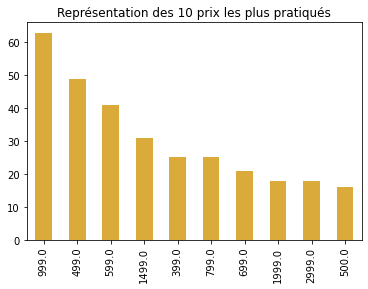

In [12]:
# Analyse colonne retail_price

print('Le nombre de valeurs uniques est de : ',data['retail_price'].nunique())
print('Le top 10 des prix des produits est : ',data['retail_price'].value_counts().head(10))

data['retail_price'].value_counts().head(10).plot(kind = 'bar', color="#DAAB3A")
plt.title('Représentation des 10 prix les plus pratiqués')

Text(0.5, 1.0, 'Analyse de la répartition des prix')

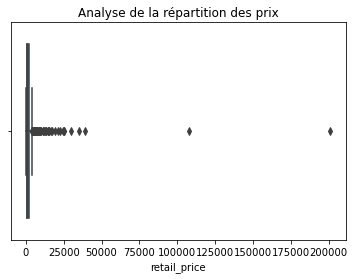

In [13]:
sns.boxplot(x = data['retail_price'], data = data)
plt.title('Analyse de la répartition des prix')

In [14]:
# Analyse des produits supérieurs à 10000 en prix.

data[data['retail_price']>=10000]

uniq_id            crawl_timestamp  \
5    893aa5ed55f7cff2eccea7758d7a86bd  2015-12-04 07:25:36 +0000   
9    710ed5f2393a4b9e8823aa0029f71f93  2015-12-04 07:25:36 +0000   
11   08452abdadb3db1e686b94a9c52fc7b6  2015-12-04 07:25:36 +0000   
90   6ae332e2bafd23267caedfcc4453257c  2016-01-04 00:20:04 +0000   
93   46e6853da6b0c796b7a0d8203ceaa88e  2016-01-04 00:20:04 +0000   
95   f4d4c2eec77732f56e47722d7a355f2b  2016-01-04 00:20:04 +0000   
97   18bd9b88e23b82fd19f8ab0c9cad6a1a  2016-01-04 00:20:04 +0000   
101  c7fcd0d983a51283e58b806f065cc920  2016-01-04 00:20:04 +0000   
124  640fd08bb3ba538d67a5c0c2c61a5c4c  2016-06-24 16:03:26 +0000   
195  2e3586dc60df258c5478446d65a317d2  2015-12-01 12:40:44 +0000   
228  9f76aaed44b540869da862c5dd4b266f  2015-12-01 12:40:44 +0000   
296  458c697fe5824552890b0e674cf5c109  2016-05-26 23:54:46 +0000   
310  64b463dc0b75ae40a848498c657041e6  2015-12-01 06:13:00 +0000   
318  fd2716d0e5dd7ffc367ca4dd9f97aaa0  2015-12-01 06:13:00 +0000   
329  cb0afa31d9ca796908fde019cd64044d  2015-12-01 06:13:00 +0000   
352  833a87b0af3b84fe246d2ebf271af177  2015-12-01 06:13:00 +0000   
428  dd5d6f0649f40d49791bbd5c00758e2f  2016-03-11 06:55:07 +0000   
437  b6c339777814451815fe7950fd4c8536  2016-06-16 08:51:06 +0000   
604  85aec4bf3185da7ebcc45003429cbfe2  2016-01-07 04:32:43 +0000   
605  bcb8e456728013a90ba66ab3b1b783ad  2016-01-07 04:32:43 +0000   
606  afc829d45be38102afaa20f4bce2f627  2016-03-12 14:25:06 +0000   
961  cf6a4daf0e795838061b0eb832bbc99d  2016-03-18 08:01:41 +0000   
964  06b8da0c6a24b91c8020f8b1c78d04c3  2016-03-18 08:01:41 +0000   

                                           product_url  \
5    http://www.flipkart.com/maserati-time-r8851116...   
9    http://www.flipkart.com/tag-heuer-cau1116-ba08...   
11   http://www.flipkart.com/cartier-w6701005-analo...   
90   http://www.flipkart.com/exotic-india-adi-buddh...   
93   http://www.flipkart.com/exotic-india-relaxing-...   
95   http://www.flipkart.com/exotic-india-blessing-...   
97   http://www.flipkart.com/diviniti-dg-royal-orna...   
101  http://www.flipkart.com/diviniti-mdf-color-rel...   
124  http://www.flipkart.com/sos-computrised-lcd-in...   
195  http://www.flipkart.com/s-c-handicrafts-sandal...   
228  http://www.flipkart.com/lal-haveli-rajasthani-...   
296  http://www.flipkart.com/ball-ibctdc-160-2gb-dd...   
310  http://www.flipkart.com/linksys-smart-wi-fi-ro...   
318  http://www.flipkart.com/asus-wireless-ac2400-d...   
329  http://www.flipkart.com/asus-rt-ac68u-dual-ban...   
352  http://www.flipkart.com/zyxel-pla-4205/p/itmdy...   
428  http://www.flipkart.com/graco-literider-click-...   
437  http://www.flipkart.com/homeedge-solid-wood-ki...   
604  http://www.flipkart.com/hp-15-ac116tx-notebook...   
605  http://www.flipkart.com/hp-15-ac121tu-notebook...   
606  http://www.flipkart.com/soulful-threads-red-th...   
961  http://www.flipkart.com/furnishingland-green-s...   
964  http://www.flipkart.com/furnishingland-maroon-...   

                                          product_name  \
5    Maserati Time R8851116001 Analog Watch  - For ...   
9    TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...   
11      Cartier W6701005 Analog Watch  - For Boys, Men   
90   Exotic India Adi Buddha Vajrasattva Showpiece ...   
93   Exotic India Relaxing Ganesha Showpiece  -  11...   
95   Exotic India Blessing Buddha Showpiece  -  36....   
97   Diviniti DG Royal Ornamental Size 4 Gurunanak ...   
101  Diviniti MDF Color Religious Wall Hanging Size...   
124  SOS COMPUTRISED LCD INTRFERENTIAL UNIT-125PROG...   
195  S C Handicrafts Sandalwood Carved Chinese Quee...   
228  Lal Haveli Rajasthani Handcrafted Decorative S...   
296  I Ball IBCTDC 160/2gb/DDR2 with Dual Core 2 RA...   
310                         Linksys Smart Wi-Fi Router   
318      Asus Wireless AC2400 Dual-band Gigabit Router   
329  Asus RT-AC68U Dual-band Wireless-AC1900 Gigabi...   
352                                     Zyxel PLA-4205   
428              G

Nous pouvons constater qu'une partie des produits sélectionnés concerne des biens de luxe ou des marques hauts de gamme (Cartier, TAG, ...).

In [15]:
# Analyse colonne product_rating

print(data['product_rating'].nunique())
print(data['product_rating'].value_counts())

27
No rating available    889
5                       43
4                       21
3                       12
1                       10
4.5                     10
4.3                      9
3.7                      8
3.5                      8
2                        6
4.1                      4
4.2                      4
3.8                      3
4.4                      3
4.7                      3
2.3                      3
3.6                      3
4.8                      2
2.5                      1
3.2                      1
2.2                      1
4.9                      1
3.3                      1
3.9                      1
3.1                      1
2.7                      1
1.5                      1
Name: product_rating, dtype: int64


Cette colonne indique la notation des produits, cette dernière contient une grande partie de ses produits sans notation. Nous pouvons estimer que cette colonne ne sera pas exploitable dans le cadre de notre analyse.

Nous avons ici analyser les principales caractéristiques des différents produits afin d'en connaître une idée plus précise de notre base de données.

Nous pouvons ressortir comme principales idées :
- Un grand nombre de catégories présentent mais il s'avère que cela représente davantage des sous catégories qu'il sera possible de regrouper en catégories généralistes.
- Les prix utilisés ressortent que 50% de nos produits sont inférieurs à 1000 dollars mais que certaines produits impactent cette moyenne notamment certains produits de luxes.
Ces derniers ne bénéficient d'aucun avantage tarifaire.

# III. Traitement du texte

Nous allons ici démarrer notre traitement de nos valeurs.

En amont, nous allons séparer les données dans la colonne product_specification afin d'en retirer des informations plus précises.

Ensuite, nous allons démarrer notre traitement du texte.

In [16]:
#Traitement des catégories
def split_categories(category, level):
    '''FOnction qui affiche les '''
    category = category.split('["')[1].split('"]')[0]
    cat = category.split(' >> ')
    if(len(cat)) < 3:
        cat = [cat[0], cat[1], 'None']
        if(len(cat))<2:
            cat = [cat[0], 'None', 'None']
    return cat[level]

def split_categories_1(category):
    return split_categories(category,0)
def split_categories_2(category):
    return split_categories(category,1)
def split_categories_3(category):
    return split_categories(category,2)

def detail_categories(dataframe):
    dataframe['cat_lvl_1'] = dataframe['product_category_tree'].apply(split_categories_1)
    dataframe['cat_lvl_2'] = dataframe['product_category_tree'].apply(split_categories_2)
    dataframe['cat_lvl_3'] = dataframe['product_category_tree'].apply(split_categories_3)
    return dataframe.drop(['product_category_tree'], axis=1)

data = detail_categories(data)

In [17]:
data.head(5)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating  \
0  No rating available  No rating available   
1  No rating available  No rating available   
2  No rating available  No rating available   
3  No rating available  No rating available   
4  No rating available  No rating available   

                              product_specifications        cat_lvl_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                cat_lvl_2         cat_lvl_3  
0  Curtains & Accessories          Curtains  
1        Baby Bath & Skin  Baby Bath Towels  
2        Baby Bath & Skin  Baby Bath Towels  
3               Bed Linen         Bedsheets  
4               Bed Linen         Bedsheets

Nous avons ici procédé à la création de 3 variables nous permettant de connaître la catégorie de manière plus précise pour nos produits. Nous allons analyser ces colonnes

In [18]:
# Analyse cat1
print(data['cat_lvl_1'].nunique())

print(data['cat_lvl_1'].value_counts())

7
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: cat_lvl_1, dtype: int64


Nous pouvons constater que notre jeu de données contient 7 catégories distinctes de produits

In [19]:
# Analyse cat2

print(data['cat_lvl_2'].nunique())

print(data['cat_lvl_2'].value_counts())

# Analyse de notre top 10 des produits les plus vendus

data['cat_lvl_2'].value_counts().head(10).plot(kind = 'bar')
plt.title('Représentation des catégories')

62
Wrist Watches                      149
Laptop Accessories                  87
Infant Wear                         84
Coffee Mugs                         74
Showpieces                          71
                                  ... 
Consumables & Disposables            1
TRUE Home Decor & Festive Needs      1
JMD Home Furnishing                  1
Kripa's Home Furnishing              1
Beauty Accessories                   1
Name: cat_lvl_2, Length: 62, dtype: int64


Text(0.5, 1.0, 'Représentation des catégories')

242
Deodorants                   65
Blankets, Quilts & Dohars    57
Routers                      49
Baby Girls' Clothes          49
USB Gadgets                  38
                             ..
Portable Projectors           1
Changing Tables               1
Titan Wrist Watches           1
Table Linen Sets              1
Strollers & Prams             1
Name: cat_lvl_3, Length: 242, dtype: int64


Text(0.5, 1.0, 'Représentation des 10 produits les plus présents dans le catalogue')

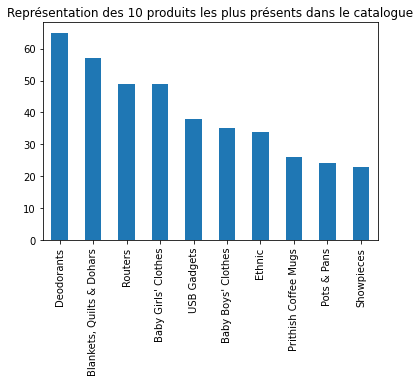

In [20]:
# Analyse colonne cat_lvl_3

print(data['cat_lvl_3'].nunique())

print(data['cat_lvl_3'].value_counts())

# Analyse de notre top 10 des produits

data['cat_lvl_3'].value_counts().head(10).plot(kind = 'bar')
plt.title('Représentation des 10 produits les plus présents dans le catalogue')

Nous avons pu constater que les produits que nous avons dans notre dataframe sont séparés en 7 catégories (montres, ordinateurs, ...), la seconde colonne indique de manière plus précise le type de produits (mugs, montres, ...). La troisième colonne indique également les catégories mais de manière à préciser la nature du produit (déodorants par exemple).

Nous allons, à présent, procéder à l'analyse plus approfondie de la colonne description.

1.   Comptage des mots et caractères







In [21]:
# Analyse de la colonne

data[['description']].head(10)

description
0  Key Features of Elegance Polyester Multicolor ...
1  Specifications of Sathiyas Cotton Bath Towel (...
2  Key Features of Eurospa Cotton Terry Face Towe...
3  Key Features of SANTOSH ROYAL FASHION Cotton P...
4  Key Features of Jaipur Print Cotton Floral Kin...
5  Maserati Time R8851116001 Analog Watch  - For ...
6  Camerii WM64 Elegance Analog Watch  - For Men,...
7  T STAR UFT-TSW-005-BK-BR Analog Watch  - For B...
8  Alfajr WY16B Youth Digital Watch  - For Men, B...
9  TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...

In [22]:
# Comptage du nombre de mots
data['text_len']=data['description'].apply(lambda x:len(x.split()))

#The below function comes in handy to count the number of characters in a text
def char_count(text):
    charc=0
    for char in text.split():
        charc +=len(char)
    return charc

# Comptage du nombre de caractères
data['text_char_len']=data['description'].apply(char_count)

data.head(2)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   

        product_rating       overall_rating  \
0  No rating available  No rating available   
1  No rating available  No rating available   

                              product_specifications        cat_lvl_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   

                cat_lvl_2         cat_lvl_3  text_len  text_char_len  
0  Curtains & Accessories          Curtains       230           1191  
1        Baby Bath & Skin  Baby Bath Towels        74            371

Nous avons ici pris la décision de créer 2 variables pour nous permettre de compter le nombre de caractères mais également le nombre de mots.

In [23]:
corpus=[]
    
for x in data['description'].str.split():
    for i in x:
        corpus.append(i)

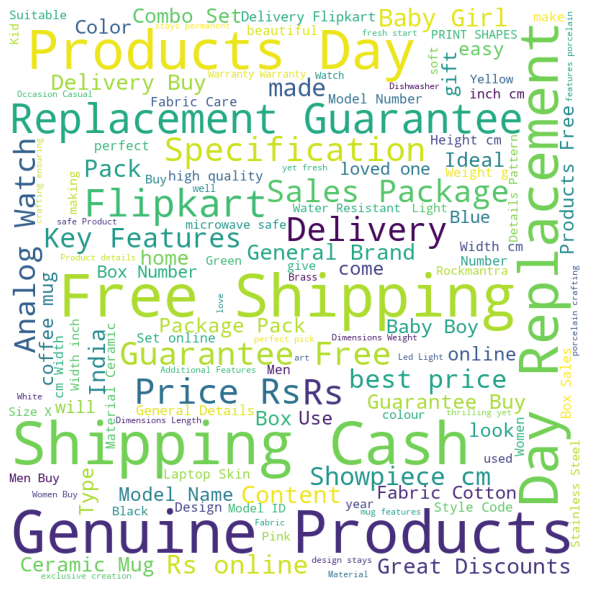

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concaténer tous les mots dans le corpus
text = ' '.join(corpus)

# Créer un objet WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text)

# Afficher le WordCloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [25]:
import plotly.express as px


dic=defaultdict(int)
for word in corpus:
    if word not in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:30] 
x,y=zip(*top)
fig=px.bar(x=x,y=y)
fig.update_layout(title={
        'text': "Mots les plus utilisés pour le StopWords",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},xaxis_title='Mots utilisés',yaxis_title='Frequency')

In [26]:
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:30] 
x,y=zip(*top)
fig=px.bar(x=x,y=y)
fig.update_layout(title={
        'text': "Mots communs les plus utilisés",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},xaxis_title='Words',yaxis_title='Frequency')

A travers nos deux graphiques, nous pouvons rapidement remarquer que certains mots peuvent être facilement supprimés.

En effet, nous constatons la présence de nombreux déterminants (of, and, ...), mais également d'adverbes ou de chiffres.

Afin de procéder à une analyse de nos données, il est nécessaire de procéder au traitement de notre colonne description afin de ne conserver que les mots nécessaires à notre modélisation.

# 

In [27]:
def clean_text(text):
    text=str(text).lower() #Converts text to lowercase
    text=re.sub('\d+', '', text) #removes numbers
    text=re.sub('\[.*?\]', '', text) #removes HTML tags
    text=re.sub('https?://\S+|www\.\S+', '', text) #removes url
    text=re.sub(r"["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", "", text) #removes emojis
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text) #removes punctuations
    return text

    
data['clean_text']=data['description'].apply(clean_text)
data.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating  \
0  No rating available  No rating available   
1  No rating available  No rating available   
2  No rating available  No rating available   
3  No rating available  No rating available   
4  No rating available  No rating available   

                              product_specifications        cat_lvl_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                cat_lvl_2         cat_lvl_3  text_len  text_char_len  \
0  Curtains & Accessories          Curtains       230           1191   
1        Baby Bath & Skin  Baby Bath Towels        74            371   
2        Baby Bath & Skin  Baby Bath Towels       215           1044   
3               Bed Linen         Bedsheets       145            714   
4               Bed Linen         Bedsheets       214            984   

                                          clean_text  
0  key features of elegance polyester multicolor ...  
1  specifications of sathiyas cotton bath towel  ...  
2  key features of eurospa cotton terry face towe...  
3  key features of santosh royal fashion cotton p...  
4  key features of jaipur print cotton floral kin...

In [29]:
corpus=[]
    
for x in data['clean_text'].str.split():
    for i in x:
        corpus.append(i)
dic=defaultdict(int)
for word in corpus:
    if word not in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:30] 
x,y=zip(*top)
fig=px.bar(x=x,y=y)
fig.update_layout(title={
        'text': "Mots les plus utilisés pour le StopWords",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},xaxis_title='Mots utilisés',yaxis_title='Frequency')

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concaténer tous les mots dans la colonne "clean_text"
text = ' '.join(data['clean_text'].str.lower())

# Créer un objet WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text)

# Afficher le WordCloud
plt.figure(figsize = (8, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Nous constatons que la fonction que nous avons utilisé a permis de supprimer certains mots ou chiffres et ainsi nous permettre de diminuer et simplifier notre colonne.

A présent, nous allons, de nouveau, utiliser notre fonction afin de compter le nombre de mots et de caractères afin de constater la différence avant et après traitement de notre colonne.

In [31]:
# Comptage des mots
data['text_len_final']=data['clean_text'].apply(lambda x:len(x.split()))

#The below function comes in handy to count the number of characters in a text
def char_count(text):
    charc=0
    for char in text.split():
        charc +=len(char)
    return charc

# Comptage du nombre de caractères
data['text_char_len_final']=data['clean_text'].apply(char_count)

data.head(5)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

   ...       overall_rating  \
0  ...  No rating available   
1  ...  No rating available   
2  ...  No rating available   
3  ...  No rating available   
4  ...  No rating available   

                              product_specifications        cat_lvl_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                cat_lvl_2         cat_lvl_3 text_len  text_char_len  \
0  Curtains & Accessories          Curtains      230           1191   
1        Baby Bath & Skin  Baby Bath Towels       74            371   
2        Baby Bath & Skin  Baby Bath Towels      215           1044   
3               Bed Linen         Bedsheets      145            714   
4               Bed Linen         Bedsheets      214            984   

                                          clean_text text_len_final  \
0  key features of elegance polyester multicolor ...            219   
1  specifications of sathiyas cotton bath towel  ...             68   
2  key features of eurospa cotton terry face towe...            199   
3  key features of santosh royal fashion cotton p...            123   
4  key features of jaipur print cotton floral kin...            186   

   text_char_len_final  
0                 1146  
1                  348  
2                  966  
3                  661  
4                  911  

[5 rows x 21 columns]

In [32]:
data.describe()

retail_price  discounted_price     text_len  text_char_len  \
count    1049.000000       1049.000000  1050.000000    1050.000000   
mean     2186.197331       1584.527169    76.202857     391.204762   
std      7639.229411       7475.099680    74.851233     377.304570   
min        35.000000         35.000000    13.000000      63.000000   
25%       555.000000        340.000000    30.000000     161.000000   
50%       999.000000        600.000000    44.000000     231.500000   
75%      1999.000000       1199.000000    94.000000     475.000000   
max    201000.000000     201000.000000   587.000000    2902.000000   

       text_len_final  text_char_len_final  
count     1050.000000          1050.000000  
mean        70.778095           363.156190  
std         71.809443           359.179138  
min         12.000000            57.000000  
25%         27.000000           143.250000  
50%         39.000000           208.000000  
75%         86.750000           446.500000  
max        562.000000          2797.000000

Nous pouvons constater que notre méthode a parfaitement fonctionné. Nous sommes passés d'une moyenne de de 76 mots à 52 et de 391 caractères à 311.

Nous avons ainsi parfaitement su répondre à la demande de traitement de notre colonne texte.
A présent, nous allons procéder à la suppression des colonnes qui ne seront plus utilisées pour notre modélisation.

Ensuite, nous allons simplement utilisé la méthode de l'encodage pour transformer notre colonne 'cat_lvl_1' en numérique.

In [33]:
# Colonnes à supprimer

data.drop(columns = ['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'pid',
       'retail_price', 'discounted_price','is_FK_Advantage_product',
       'description', 'product_rating', 'overall_rating',
       'product_specifications', 'cat_lvl_2', 'cat_lvl_3',
       'text_len', 'text_char_len', 'text_len_final',
       'text_char_len_final'], inplace = True)

data.head(5)

image        cat_lvl_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care   
3  d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing   

                                          clean_text  
0  key features of elegance polyester multicolor ...  
1  specifications of sathiyas cotton bath towel  ...  
2  key features of eurospa cotton terry face towe...  
3  key features of santosh royal fashion cotton p...  
4  key features of jaipur print cotton floral kin...

In [34]:
# Labelisation des catégories de produits
from sklearn import preprocessing


encode = preprocessing.LabelEncoder()
data['cat_label'] = encode.fit_transform(np.array(data['cat_lvl_1']))

data.head(3)

image        cat_lvl_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care   

                                          clean_text  cat_label  
0  key features of elegance polyester multicolor ...          4  
1  specifications of sathiyas cotton bath towel  ...          0  
2  key features of eurospa cotton terry face towe...          0

Text(0.5, 1.0, 'Analyse des valeurs manquantes')

<Figure size 144x288 with 0 Axes>

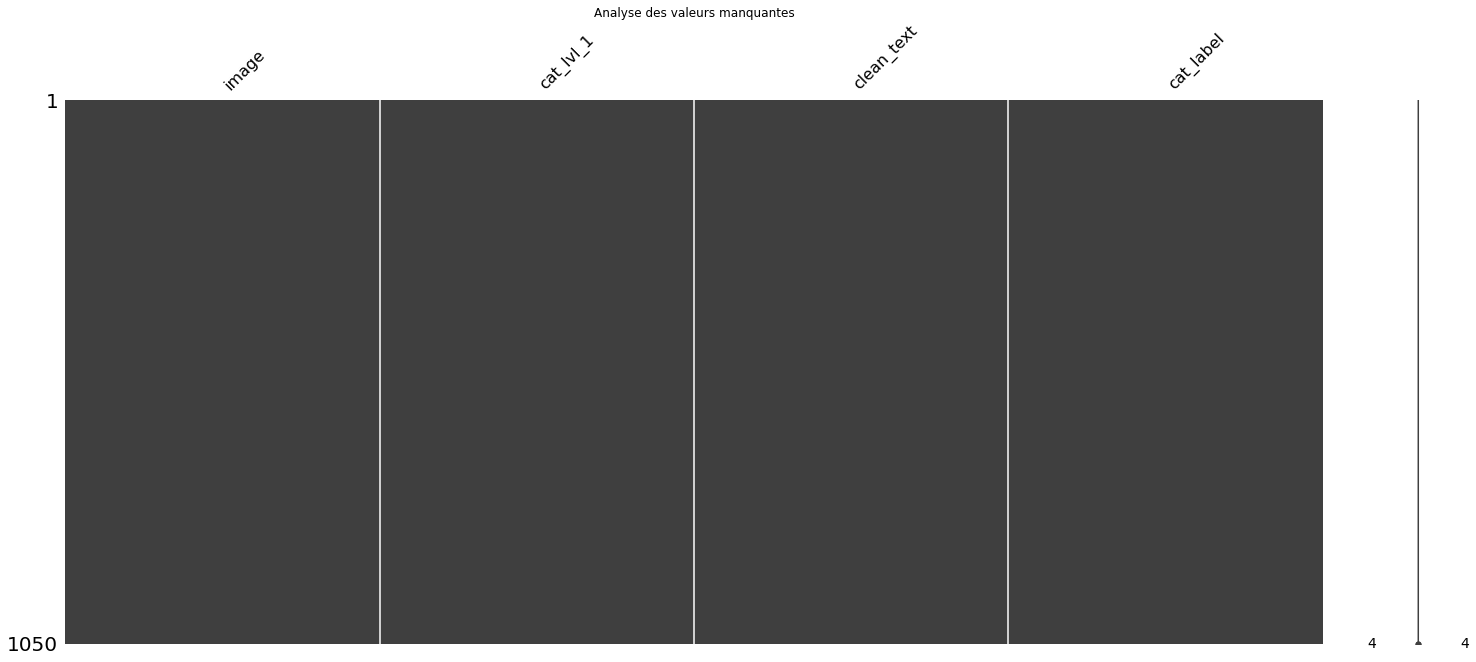

In [35]:
plt.figure(figsize = (2,4))
msno.matrix(data)
plt.title('Analyse des valeurs manquantes')

Nous pouvons confirmer que notre préparation des données est désormais finalisée.

En effet, nous avons un fichier sans valeurs manquantes, nos données sont désormais aptes à être analysés à travers les différents algorithmes de NLP.

# IV. Démarches de word/sentence embedding

### 1.   Approche Word2Vec

Word2vec est un groupe de modèles utilisé pour le plongement lexical (word embedding). Ces modèles ont été développés par une équipe de recherche chez Google. Ce sont des réseaux de neurones artificiels à deux couches entraînés pour reconstruire le contexte linguistique des mots.


Le modèle CountVectorizer permet de transformer un texte en un vecteur de fréquences de mots. Il crée un vocabulaire à partir des mots présents dans le texte et compte le nombre d'occurrences de chaque mot dans chaque document. Ainsi, chaque document est représenté par un vecteur de taille égale au nombre de mots dans le vocabulaire, où chaque élément du vecteur représente le nombre d'occurrences du mot correspondant dans le document. Le modèle CountVectorizer est très utile pour les tâches de classification de texte telles que la détection de spam ou la classification de documents.

Le modèle TF-IDF (Term Frequency-Inverse Document Frequency) est une méthode similaire au CountVectorizer, mais il prend également en compte la fréquence des mots dans le corpus global. Le TF-IDF mesure l'importance relative d'un mot dans un document en multipliant la fréquence d'apparition du mot dans le document (TF) par l'inverse de sa fréquence d'apparition dans tous les documents du corpus (IDF). Cela permet de mettre en évidence les mots qui sont fréquents dans un document mais peu fréquents dans l'ensemble du corpus, ce qui peut aider à identifier des mots-clés importants dans un document. Le modèle TF-IDF est souvent utilisé pour la recherche d'information, l'extraction de mots-clés et la recommandation de contenu personnalisé.

In [36]:
# Création du nombre de catégories pour les clusters
n_clusters = list(data.cat_lvl_1.unique())

# Création de la feature
y_feature = data['cat_label']

# Création des méthodes Count et tfifd vectorizer
vector = CountVectorizer()
vectorizer = TfidfVectorizer()

feat = 'clean_text'
vect_fit = vector.fit(data[feat])
tf_vectorizer_fit = vectorizer.fit(data[feat])

vect_transform = vector.transform(data[feat])  
tf_vectorizer_transform = vectorizer.transform(data[feat])  

print(tf_vectorizer_transform.shape)

(1050, 5650)


Nous allons à présent utilisé la méthode du TSNE afin de pouvoir visualiser nos clusters.

Afin d'analyser nos données, nous allons prendre la décision d'indiquer 7 clusters du fait de la présence de 7 catégories.

In [37]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()

    # Nous allons déterminer le nombre de clusters
    labels=len(n_clusters)

    tsne = manifold.TSNE(n_components=2, learning_rate=200, init='random', random_state=100)
    
    X_tsne = tsne.fit_transform(features)


    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=labels, random_state=100)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_feature, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "Temps d'exécution : ", time2)
    
    return ARI, X_tsne, cls.labels_


In [38]:
# visualisation du Tsne selon les vraies catégories et selon les clusters
def visu_TSNE(X_tsne, y_true, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_feature)
    #cmap='Set1'
    ax.legend(handles=scatter.legend_elements()[0], labels=n_clusters, loc="best", title="Categorie")
    plt.title('Catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels)
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Clusters')
    
    plt.show()
    print("ARI : ", ARI)

Utilisation de la méthode CountVectorizer : 
-----------------
ARI :  0.308 Temps d'exécution :  93.0


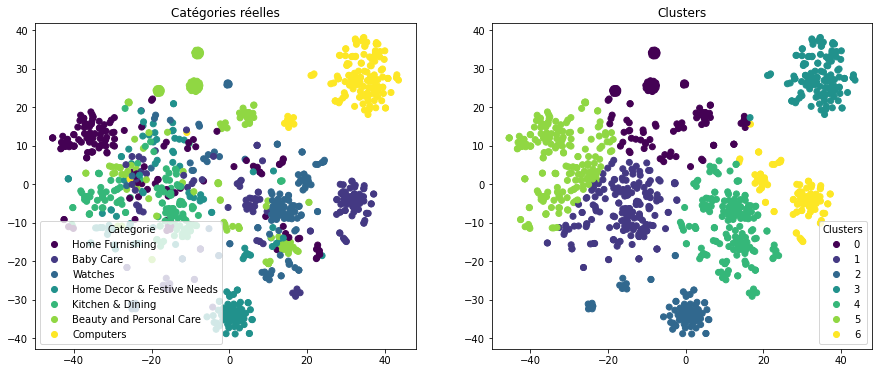

ARI :  0.308


In [39]:
print("Utilisation de la méthode CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(vect_transform)
visu_TSNE(X_tsne, y_feature, labels, ARI)


In [40]:
print("Utilisation de la méthode Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(tf_vectorizer_transform)
visu_TSNE(X_tsne, y_feature, labels, ARI)

Utilisation de la méthode Tf-idf : 
--------
ARI :  0.4291 Temps d'exécution :  89.0


ARI :  0.4291


Nous avons constaté que la modélisation de nos deux modèles présentent des scores assez différents entre 0.33 pour la méthode du CountVectorizer et 0.47 pour la méthode TF-IDF.

La seconde méthode présentant les meilleurs résultats. Il sera intéressant de conserver ce modèle.

### 2.   Approche BERT

La méthode BERT (Bidirectional Encoder Representations from Transformers) est un modèle créé par Google en 2018.

In [41]:
def featTxt_WE_bert(data):
    
    # Création des phrases
    sentences = data['clean_text'].values
    sentences = [x for x in sentences]
    batch_size = 10
    max_length = 64
    model_type = 'bert-base-uncased'
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()
    model = TFAutoModel.from_pretrained(model_type)


    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        
        input_ids = []
        token_type_ids = []
        attention_mask = []

        for sent in sentences[idx:idx+batch_size]:
           

            bert_inp = bert_tokenizer.encode_plus(sent,
                                                  add_special_tokens = True,
                                                  max_length = max_length,
                                                  padding = 'max_length',
                                                  return_attention_mask = True, 
                                                  return_token_type_ids = True,
                                                  truncation = True,
                                                  return_tensors = "tf"
                                                )

            input_ids.append(bert_inp['input_ids'][0])
            token_type_ids.append(bert_inp['token_type_ids'][0])
            attention_mask.append(bert_inp['attention_mask'][0])

        input_ids = np.asarray(input_ids)
        token_type_ids = np.asarray(token_type_ids)
        attention_mask = np.array(attention_mask)
        
        text_preprocessed = {"input_ids" : input_ids, 
                             "attention_mask" : attention_mask, 
                             "token_type_ids" : token_type_ids}
        outputs = model(text_preprocessed)
        last_hidden_states = outputs[0]
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)  
    
    
    return features_bert

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


temps traitement :  415.0
ARI :  0.3426 Temps d'exécution :  81.0


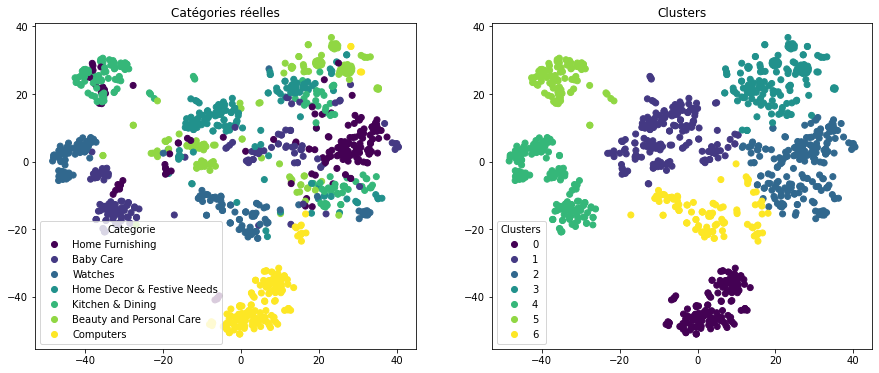

ARI :  0.3426


In [42]:
features_bert = featTxt_WE_bert(data)

ARI, X_tsne, labels = ARI_fct(features_bert)

visu_TSNE(X_tsne, y_feature, labels, ARI)

Ce modèle présente des résultats assez décevants avec un ARI de 0.33 mais également avec un temps d'exécution plus élevée que nos autres modèles.

Ce dernier ne sera pas conservé.

### 3. Approche USE

In [43]:
imp_modèle = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [44]:


def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time3 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = imp_modèle(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time3,0)
    return features

ARI :  0.4211 Temps d'exécution :  87.0


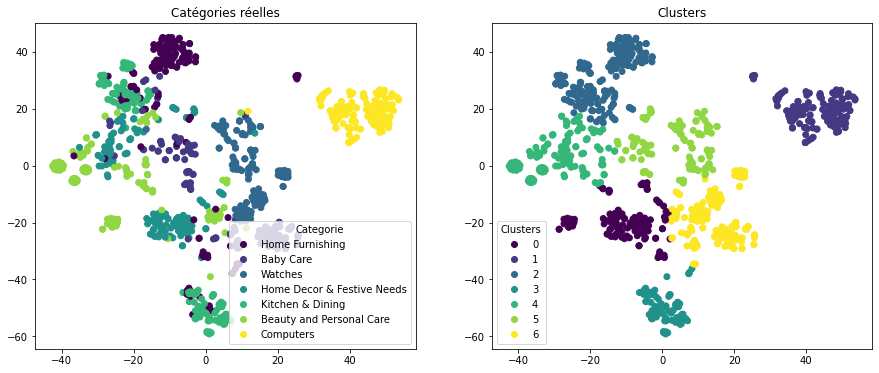

ARI :  0.4211


In [45]:
sentences = data['clean_text'].to_list()
batch_size = 10
features_USE = feature_USE_fct(sentences, batch_size)

ARI, X_tsne, labels = ARI_fct(features_USE)

visu_TSNE(X_tsne, y_feature, labels, ARI)

Nous constatons que la méthode TF-IDF présente les meilleurs résultats pour notre étape de traitement de textes.

A présent, nous allons procéder à l'analyse des images afin de sélectionner le meilleur modèle.

In [46]:
#Exportation du jeu de données pour la modélisation

data.to_csv("data_image.csv",header=True,index=False)

# 

## V. Traitement des images

### 1.   Import des données

In [47]:
# Importation du jeu de données

# Recupération d'un datset avec image et leur label 

data_image = data[["image", "cat_label"]]

# Recupération d'un datset avec image et leur label 

data_image = data[["image", "cat_label"]]

path = "C:/Users/gregm/OneDrive/Bureau/Formation OCR/Projet 6/Images/"

list_photos = [file for file in listdir(path)]
print(len(list_photos))

data_image.image = data_image.image.apply(lambda x: path+str(x) )

1050


Nous avons pu importer nos 1050 images présentent dans notre dossier.

Nous allons simplement consulter 2 images de manière aléatoire afin de vérifier que nous avons bien intégré les données.

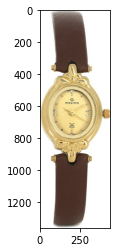

In [48]:
image = imread(path+list_photos[23])
plt.imshow(image)

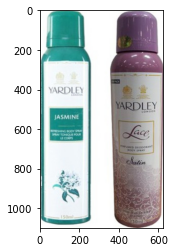

In [49]:
image = imread(path+list_photos[500])
plt.imshow(image)

Notre méthode a parfaitement fonctionné.

A présent, nous allons analyser nos images à l'aide de deux descripteurs, à savoir la méthode SIFT et ORB.

# 

### 2.   Approche SIFT et ORB

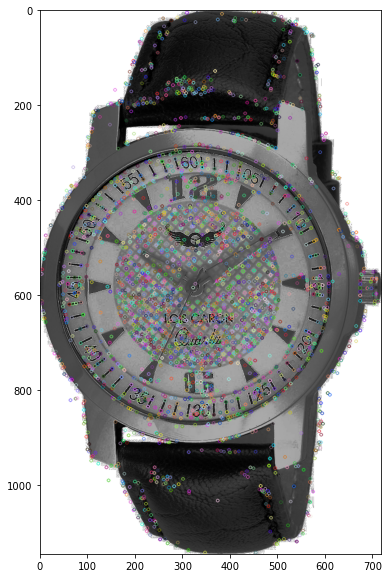

Le nombre de descripteurs pour la méthode SIFT est de :  (3526, 128)


In [50]:
# Création du modèle SIFT

sift = cv2.xfeatures2d.SIFT_create()

# convertir en niveaux de gris
image = cv2.imread(data_image.image[12],0)

# equalize image histogram
image = cv2.equalizeHist(image)


# Création des points de détection des images
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)

# Représentation graphique
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()
print("Le nombre de descripteurs pour la méthode SIFT est de : ", des.shape)

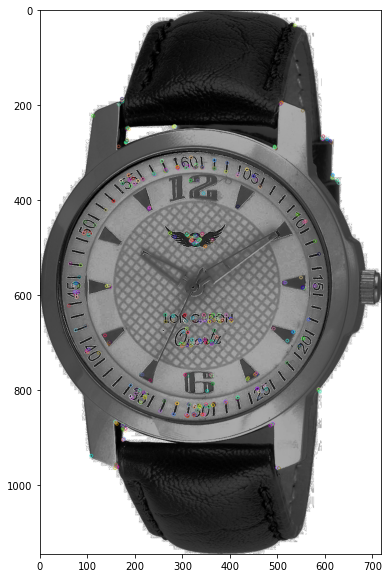

Le nombre de descripteurs pour la méthode ORB est de :  (500, 32)


In [51]:
# Création du modèle ORB
orb = cv2.ORB_create()

# convertir en niveaux de gris
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image = cv2.imread(data_image.image[12],0) # convert in gray

image = cv2.equalizeHist(image)   # equalize image histogram

# Création des points de détection des images
kp = orb.detect(image, None)
kp, des = orb.compute(image, kp)
img=cv2.drawKeypoints(image,kp,image)


# Représentation graphique
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()
print("Le nombre de descripteurs pour la méthode ORB est de : ", des.shape)

Le modèle SIFT semble être le plus précis concernant l'analyse des images.
En effet, ce modèle prend en compte une plus grande précision des images tandis que le modèle ORB n'analyse qu'à hauteur de 500 points.

Nous allons analyser plus précisement notre modèle SIFT pour les clusters.

In [52]:
# Utilisation du modèle du SIFT

sift_keypoints = []
temps1 = time.time()
sift = cv2.xfeatures2d.SIFT_create()


for image_num in range(data_image.shape[0]):
    # Convertir en gris
    image = cv2.imread(data_image.image.iloc[image_num],0) 
    scale = 0.5 # 50% of original image
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    dim = (width, height)    
    image =cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    res = cv2.equalizeHist(image)   # equalize image histogram
    del image
    kp, des = sift.detectAndCompute(res, None)
    del res
    sift_keypoints.append(des)
    del kp,des
    
    
# liste de descripteurs par image : utilisée pour réaliser les histogrammes par image
sift_keypoints_by_img = np.asarray(sift_keypoints)


# liste de descripteurs pour l'ensemble des images : utilisé pour créer les clusters de descripteurs
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis = 0)


print("Nombre de descripteurs : ", sift_keypoints_all.shape)
duration1=time.time()-temps1
print("Le délai de traitement pour le SIFT est de : ", "%15.2f" % duration1, "secondes")


# Sélection du nombre de clusters
temps2=time.time()
k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters = k, init_size = 3*k, random_state = 0)
kmeans.fit(sift_keypoints_all)
duration2=time.time()-temps2
print("Le délai de traitement pour le KMeans est de : ", "%15.2f" % duration2, "secondes")

Nombre de descripteurs :  (2451020, 128)
Le délai de traitement pour le SIFT est de :           698.92 secondes
Nombre de clusters estimés :  1566
Création de 1566 clusters de descripteurs ...
Le délai de traitement pour le KMeans est de :          1020.01 secondes


In [53]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
histo_vect=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    histo_vect.append(hist) #histogram is the feature vector

im_features = np.asarray(histo_vect)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :           367.84 secondes


In [54]:
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components = 0.9)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 1566)
Dimensions dataset après réduction PCA :  (1050, 299)


In [55]:
tsne = manifold.TSNE(n_components=2, learning_rate=200, init='random', random_state=100)
X_tsne_sift = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data_image["cat_label"]
print(df_tsne.shape)

(1050, 3)


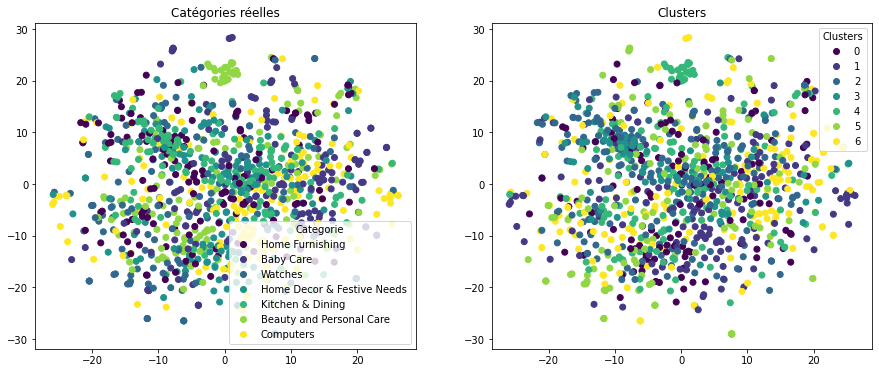

ARI :  0.4211


In [56]:
# Visualisation des clusters
visu_TSNE(X_tsne_sift, y_feature, labels, ARI)


Le résultat obtenu n'est pas cohérent dans notre analyse. Il est difficile d'analyser nos clusters. Nous n'allons pas garder cette méthode.

A présent, nous allons utiliser les modèles de réseaux de neurones avec du Transfer Learning (VGG16 et 19) pour procéder à la segmentation des données.

# 

### 3.   Transfer Learning

In [57]:
# Utilisation du VGG16

model = VGG16()


model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

vect = []
for image_num in range(data_image.shape[0]):
    # load an image from file
    image = load_img(data_image.image.iloc[image_num], target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)

    # get extracted features
    features = model.predict(image)
    print(features.shape)
    vect.append(features[0])
    im_feat_cnn = pd.DataFrame(vect)
    
temps1=time.time()
duration3=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration3, "secondes")

1/1 [==============================] - 2s 2s/step
(1, 4096)
1/1 [==============================] - 1s 677ms/step
(1, 4096)
1/1 [==============================] - 1s 554ms/step
(1, 4096)
1/1 [==============================] - 1s 832ms/step
(1, 4096)
1/1 [==============================] - 1s 1s/step
(1, 4096)
1/1 [==============================] - 1s 1s/step
(1, 4096)
1/1 [==============================] - 1s 1s/step
(1, 4096)
1/1 [==============================] - 1s 769ms/step
(1, 4096)
1/1 [==============================] - 1s 850ms/step
(1, 4096)
1/1 [==============================] - 1s 725ms/step
(1, 4096)
1/1 [==============================] - 1s 648ms/step
(1, 4096)
1/1 [==============================] - 1s 768ms/step
(1, 4096)
1/1 [==============================] - 1s 816ms/step
(1, 4096)
1/1 [==============================] - 1s 803ms/step
(1, 4096)
1/1 [==============================] - 1s 928ms/step
(1, 4096)
1/1 [==============================] - 1s 847ms/step
(1, 4096)
1/1 

Dataset avant PCA :  (1050, 4096)
Dataset après PCA :  (1050, 314)
ARI :  0.4443 Temps d'exécution :  10.0


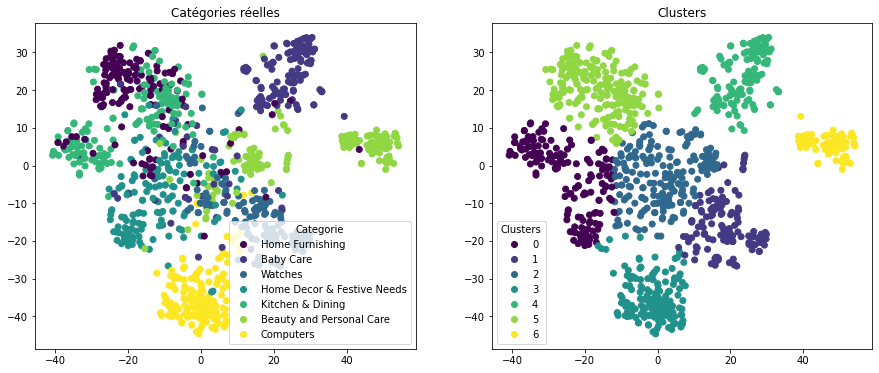

ARI :  0.4443


In [58]:
print("Dataset avant PCA : ", im_feat_cnn.shape)
pca = decomposition.PCA(n_components=0.9)
feat_pca_cnn= pca.fit_transform(im_feat_cnn)
print("Dataset après PCA : ", feat_pca_cnn.shape)

ARI_cnn, X_tsne_cnn, labels_cnn = ARI_fct(feat_pca_cnn)

visu_TSNE(X_tsne_cnn, y_feature, labels_cnn, ARI_cnn)

In [59]:
# Utilisation du VGG19

model = VGG19()
# remove the output layer

model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

vect = []
for image_num in range(data_image.shape[0]):
    # load an image from file
    image = load_img(data_image.image.iloc[image_num], target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)

    # get extracted features
    features = model.predict(image)
    print(features.shape)
    vect.append(features[0])
    im_feat_cnn = pd.DataFrame(vect)

1/1 [==============================] - 1s 694ms/step
(1, 4096)
1/1 [==============================] - 0s 396ms/step
(1, 4096)
1/1 [==============================] - 0s 412ms/step
(1, 4096)
1/1 [==============================] - 0s 427ms/step
(1, 4096)
1/1 [==============================] - 0s 443ms/step
(1, 4096)
1/1 [==============================] - 0s 427ms/step
(1, 4096)
1/1 [==============================] - 0s 411ms/step
(1, 4096)
1/1 [==============================] - 0s 428ms/step
(1, 4096)
1/1 [==============================] - 0s 411ms/step
(1, 4096)
1/1 [==============================] - 0s 425ms/step
(1, 4096)
1/1 [==============================] - 0s 426ms/step
(1, 4096)
1/1 [==============================] - 0s 425ms/step
(1, 4096)
1/1 [==============================] - 0s 428ms/step
(1, 4096)
1/1 [==============================] - 0s 426ms/step
(1, 4096)
1/1 [==============================] - 0s 426ms/step
(1, 4096)
1/1 [==============================] - 0s 424ms/step
(1

Dataset avant  PCA :  (1050, 4096)
Dataset après PCA :  (1050, 308)
ARI :  0.57 Temps d'exécution :  4.0


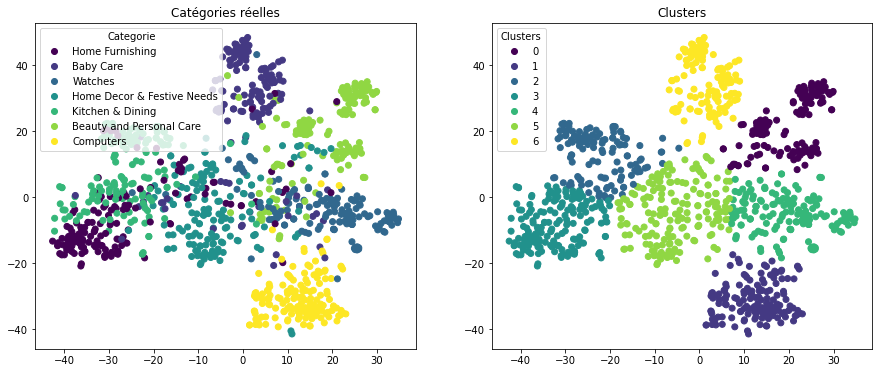

ARI :  0.57


In [60]:
print("Dataset avant  PCA : ", im_feat_cnn.shape)
pca = decomposition.PCA(n_components=0.9)
feat_pca_cnn= pca.fit_transform(im_feat_cnn)
print("Dataset après PCA : ", feat_pca_cnn.shape)

ARI_cnn, X_tsne_cnn, labels_cnn = ARI_fct(feat_pca_cnn)

visu_TSNE(X_tsne_cnn, y_feature, labels_cnn, ARI_cnn)

Nous pouvons de suite constater une très forte amélioration de notre score ARI avec l'utilisation du modèle VGG 19.

Ce dernier présente un temps d'exécution plus important mais une amélioration d'environ 0.1 sur le score.

# 

### VI. Conclusion Etude de faisabilité

Nous pouvons conclure à travers cette première partie que nous avons pu répondre favorablement à la demande d'étude et de clusterisation des catégories de produits.

Notre traitement s'est déroulé en deux grandes étapes :
- Le traitement des textes,
- Le traitement des images.

Pour le traitement de texte, nous avons principalement utilisé les techniques standards tels que le comptage des mots, la suppression des mots inutiles (déterminants, chiffres, ...). 
Ce traitement a permis de procéder à une segmentation grâce à des méthodes de traitements (USE, BERT, ...).
Nous constatons que la méthode TF-IDF présente les meilleurs résultats concernant la phase de traitement de texte, cette dernière ayant obtenu le score le plus élevé.

Concernant le traitement des images, nous avons procédé à l'appel des données (1050 images dans un fichier spécifique).

Nous avons également procédé à la l'analyse des images à travers plusieurs méthodes tels que les méthodes SIFT et ORB qui n'ont pas su répondre à notre problématique. De plus, ces deux méthodes semblent très peu utilisés du fait de leur longévité.
Les méthodes ayant obtenues les meilleurs résultats sont liés aux réseaux de neurones grâce aux modèles de Transfer Learning VGG16 et VGG19.

Ce dernier présente un résultat très intéressant, ce dernier sera également conservé pour la phase de traitement de texte.